In [27]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Text(0.5, 0, '2')

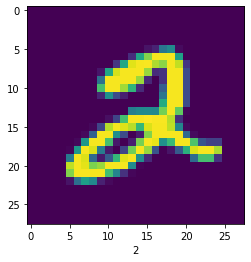

In [13]:
plt.imshow(X_train[5])
plt.xlabel(y_train[5])

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [18]:
len(X_train_flattened[0])

784

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 635us/step - loss: 0.4851 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.3057 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 1s 643us/step - loss: 0.2845 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 1s 566us/step - loss: 0.2739 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 1s 537us/step - loss: 0.2677 - accuracy: 0.9261


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 409us/step - loss: 0.2673 - accuracy: 0.9264


[0.2672799825668335, 0.9264000058174133]

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.1806989e-05, 6.6581761e-11, 3.3580334e-05, 9.5191002e-03,
       1.5050766e-06, 5.1017454e-05, 9.6054598e-10, 7.8727996e-01,
       5.6756569e-05, 8.6423755e-04], dtype=float32)

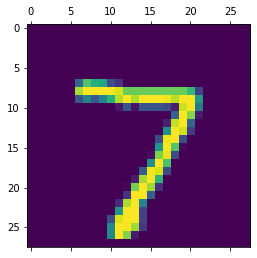

In [22]:
plt.matshow(X_test[0])

In [23]:

np.argmax(y_predicted[0])

7

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    1,    2,    0,    7,   11,    3,    3,    1],
       [   0, 1106,    4,    2,    0,    1,    4,    2,   16,    0],
       [   3,    7,  920,   21,    8,    5,   13,   11,   42,    2],
       [   1,    0,   14,  929,    0,   21,    3,   12,   23,    7],
       [   1,    1,    3,    1,  930,    0,   10,    4,   10,   22],
       [   7,    1,    2,   36,   11,  765,   17,    9,   36,    8],
       [   7,    3,    5,    1,    8,    8,  920,    2,    4,    0],
       [   1,    5,   22,    8,    9,    0,    0,  955,    2,   26],
       [   4,    5,    5,   17,   10,   17,   10,   13,  883,   10],
       [   9,    7,    1,   10,   34,    6,    0,   31,    7,  904]])>

Text(69.0, 0.5, 'Truth')

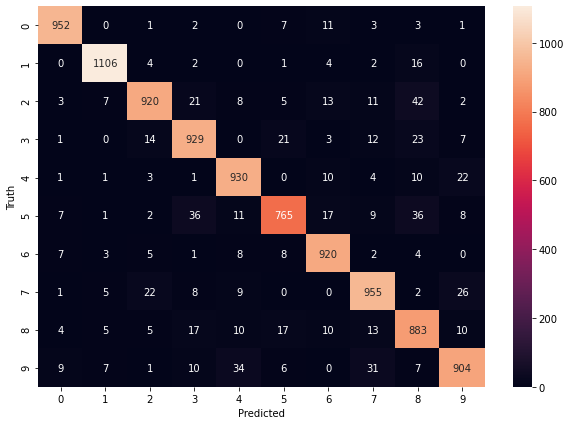

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.2869 - accuracy: 0.9206
Epoch 2/10
1875/1875 [==============================] - 2s 852us/step - loss: 0.1293 - accuracy: 0.96280s - loss: 0.1296 - accuracy: 0.
Epoch 3/10
1875/1875 [==============================] - 2s 867us/step - loss: 0.0925 - accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.0725 - accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.0597 - accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.0487 - accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.0407 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.0350 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.0293 - accuracy: 0.9908
Epoch 10/10
1875/1875 [=========

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 564us/step - loss: 0.0854 - accuracy: 0.9753


[0.08538759499788284, 0.9753000140190125]

### Using CNN to solve this problem

In [33]:
from tensorflow.keras import  layers, models

In [48]:

X_train = X_train.reshape(-1,28,28,1)
X_train.shape


(60000, 28, 28, 1)

In [49]:

X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [52]:
model=models.Sequential([
    layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
   # layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
   #layers.MaxPooling2D(2,2)
    
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2094 - accuracy: 0.9410
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0753 - accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0571 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0469 - accuracy: 0.9857
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0407 - accuracy: 0.9876


In [55]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9835


[0.04980279877781868, 0.9835000038146973]

In [59]:
y_pred=model.predict(X_test)
y_pred[:6]
y_pred=[np.argmax(element) for element in y_pred]

In [60]:
cm=tf.math.confusion_matrix(y_test,y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    1,    0,    1,    2,    0,    3,    2],
       [   0, 1127,    3,    1,    1,    0,    0,    1,    2,    0],
       [   1,    2, 1011,    0,    1,    0,    2,    9,    6,    0],
       [   0,    0,    0, 1001,    0,    2,    0,    3,    3,    1],
       [   1,    0,    0,    0,  969,    0,    1,    1,    2,    8],
       [   1,    0,    2,   11,    0,  873,    1,    0,    2,    2],
       [   7,    3,    0,    0,    3,    2,  940,    1,    2,    0],
       [   0,    1,    8,    2,    1,    0,    0, 1014,    1,    1],
       [   6,    0,    6,    3,    1,    1,    2,    5,  947,    3],
       [   1,    0,    0,    5,    7,    1,    0,    8,    4,  983]])>

Text(69.0, 0.5, 'Truth')

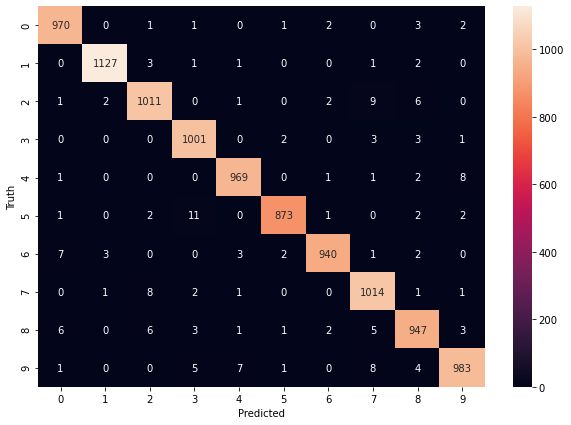

In [64]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')